In [16]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel

In [2]:
#1-3
dh = pd.read_csv('boston_house_prices.csv', sep=',')
warnings.filterwarnings("ignore", category=UserWarning)
dh.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
dh.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
dh.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

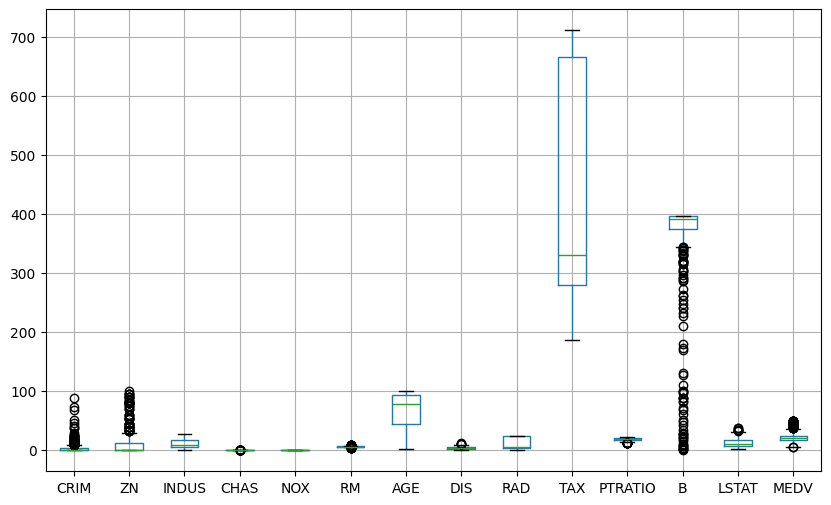

In [6]:
plt.figure(figsize=(10, 6))
dh.boxplot(column=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])
plt.show()

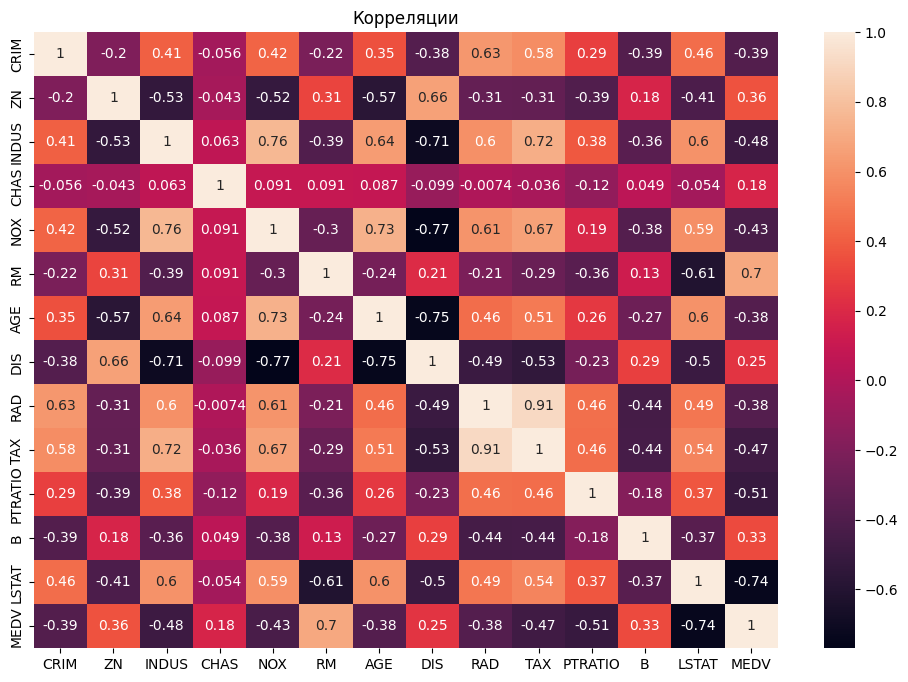

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(dh.corr(), annot=True)
plt.title('Корреляции')
plt.show()

In [8]:
#4
X = dh.drop('MEDV', axis=1)
y = dh['MEDV']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


In [9]:
#5
model = LinearRegression()
model.fit(X_train, y_train)
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 354, dtype: float64

In [10]:
#6
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

MAE: 3.1627098714573947
MSE: 21.51744423117709
RMSE: 4.638689926172808
R^2: 0.7112260057484948


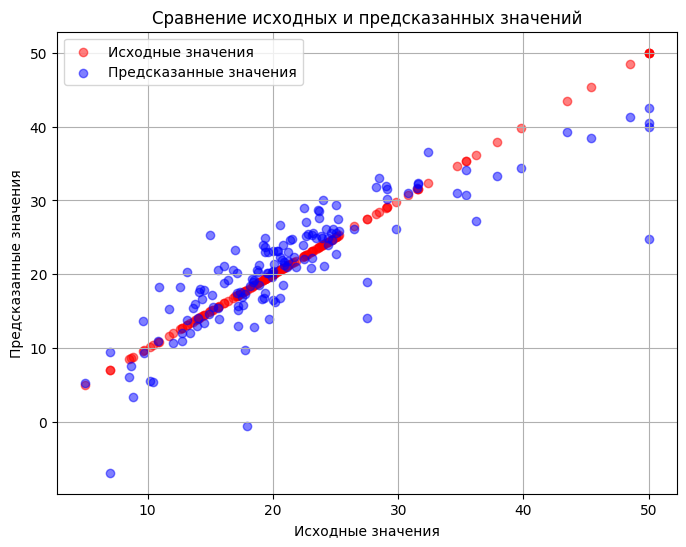

In [11]:
#7
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_test, color='red', label='Исходные значения', alpha=0.5)
plt.scatter(y_test, y_pred, color='blue', label='Предсказанные значения', alpha=0.5)

plt.xlabel('Исходные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение исходных и предсказанных значений')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#8
mse_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)
r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(f'Средний MSE: {mse_scores.mean()}')
print(f'Средний RMSE: {rmse_scores.mean()}')
print(f'Средний R^2: {r2_scores.mean()}')

Средний MSE: 25.977777430926352
Средний RMSE: 5.074830769055447
Средний R^2: 0.6879825316957138


In [13]:
#9
lasso_cv_model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5)
lasso_cv_model.fit(X_train, y_train)

# наиболее значимые признаки с использованием L1-регуляризации
sfm = SelectFromModel(lasso_cv_model, prefit=True)
X_train_l1 = sfm.transform(X_train)
X_test_l1 = sfm.transform(X_test)

# Обучение модели на выбранных признаках
model_l1 = LinearRegression()
model_l1.fit(X_train_l1, y_train)

# прогнозы на тестовых данных
y_pred_l1 = model_l1.predict(X_test_l1)

# считаем метрики качества
mse_l1 = mean_squared_error(y_test, y_pred_l1)
rmse_l1 = np.sqrt(mse_l1)
r2_l1 = r2_score(y_test, y_pred_l1)

print("Модель с L1 (Lasso) регуляризацией и отбором признаков:")
print(f'MSE: {mse_l1}')
print(f'RMSE: {rmse_l1}')
print(f'R^2: {r2_l1}')

Модель с L1 (Lasso) регуляризацией и отбором признаков:
MSE: 21.51744423117709
RMSE: 4.638689926172808
R^2: 0.7112260057484948


In [14]:
#9
# Создайте модель L2 (Ridge) регуляризации с кросс-валидацией
ridge_cv_model = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5)
ridge_cv_model.fit(X_train, y_train)

# Выберите наиболее значимые признаки с использованием L2-регуляризации
sfm = SelectFromModel(ridge_cv_model, prefit=True)
X_train_l2 = sfm.transform(X_train)
X_test_l2 = sfm.transform(X_test)

# Обучите модель на выбранных признаках
model_l2 = LinearRegression()
model_l2.fit(X_train_l2, y_train)

# Сделайте прогнозы на тестовых данных
y_pred_l2 = model_l2.predict(X_test_l2)

# Рассчитайте метрики качества
mse_l2 = mean_squared_error(y_test, y_pred_l2)
rmse_l2 = np.sqrt(mse_l2)
r2_l2 = r2_score(y_test, y_pred_l2)

# Выведите результаты
print("Модель с L2 (Ridge) регуляризацией и отбором признаков:")
print(f'MSE: {mse_l2}')
print(f'RMSE: {rmse_l2}')
print(f'R^2: {r2_l2}')

Модель с L2 (Ridge) регуляризацией и отбором признаков:
MSE: 34.27354056043343
RMSE: 5.854360815702551
R^2: 0.5400333283802864


In [15]:
#10
print("Линейная регрессия")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}\n')

print("После кросс-валадации")
print(f'Средний MSE: {mse_scores.mean()}')
print(f'Средний RMSE: {rmse_scores.mean()}')
print(f'Средний R^2: {r2_scores.mean()}\n')

print("Модель с L1 (Lasso) регуляризацией и отбором признаков:")
print(f'MSE: {mse_l1}')
print(f'RMSE: {rmse_l1}')
print(f'R^2: {r2_l1}\n')

# Выведите результаты
print("Модель с L2 (Ridge) регуляризацией и отбором признаков:")
print(f'MSE: {mse_l2}')
print(f'RMSE: {rmse_l2}')
print(f'R^2: {r2_l2}')

Линейная регрессия
MAE: 3.1627098714573947
MSE: 21.51744423117709
RMSE: 4.638689926172808
R^2: 0.7112260057484948

После кросс-валадации
Средний MSE: 25.977777430926352
Средний RMSE: 5.074830769055447
Средний R^2: 0.6879825316957138

Модель с L1 (Lasso) регуляризацией и отбором признаков:
MSE: 21.51744423117709
RMSE: 4.638689926172808
R^2: 0.7112260057484948

Модель с L2 (Ridge) регуляризацией и отбором признаков:
MSE: 34.27354056043343
RMSE: 5.854360815702551
R^2: 0.5400333283802864
